# 20220211_枠を作りたい

In [1]:
# to read and visualize spatial data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


In [3]:
path = "./tl_2021_us_county/tl_2021_us_county.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")

<AxesSubplot:>

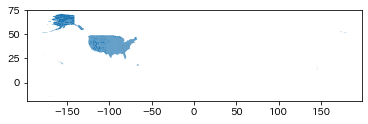

In [4]:
df.plot()

In [5]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68140 41.04566, -96.68139 41.045..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350..."


"Allegheny County",
"Armstrong County",
"Beaver County",
"Butler County",
"Cambria County",
"Fayette County",
"Greene County",
"Indiana County",
"Lawrence County",
"Somerset County",
"Washington County"

In [11]:
df[df["NAME"]=="Allegheny" or "Armstrong"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
13,48,011,01383791,48011,Armstrong,Armstrong County,06,H1,G4020,108,11100,None,A,2354617585,12183672,+34.9641790,-101.3566363,"POLYGON ((-101.08728 35.02708, -101.08729 35.0..."
2616,42,003,01213657,42003,Allegheny,Allegheny County,06,H1,G4020,430,38300,None,A,1890571830,37043982,+40.4697574,-079.9804515,"POLYGON ((-79.83925 40.20875, -79.84025 40.208..."
3166,42,005,01213658,42005,Armstrong,Armstrong County,06,H1,G4020,430,38300,None,A,1692093647,27586728,+40.8123805,-079.4641285,"POLYGON ((-79.55165 40.60189, -79.55157 40.601..."


In [17]:
# All US -> Only PA
df_pa = df[df["STATEFP"] == "42"]

In [20]:
# All PA -> Only the 11 counties
df_pa = df_pa[df_pa["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

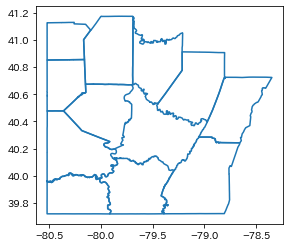

In [22]:
df_pa.boundary.plot()
plt.show()

# 地図プロット

In [23]:
import contextily as ctx 

In [28]:
def countyPlot(ct,data,cmap,zoom,dpi):
    county = df_pa.loc[df_pa['NAME'] == ct]
    county.crs = "EPSG:4326"
    f,ax = plt.subplots(1,1, figsize=(8,8), 
    sharex=True,sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title('Map using Contextily - ' + data,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = county.to_crs(epsg=3857).plot(data, ax=ax, 
    edgecolor='blue',    cmap=cmap, alpha = 0.2, 
    legend=True, cax=cax)
    ctx.add_basemap(ux,    zoom=zoom,
    source=ctx.providers.OpenStreetMap.Mapnik);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig(
    'US Contextily Map with zoom = ' + str(zoom) +' .png')
    plt.show()

In [29]:
list(df_pa)

['STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'LSAD',
 'CLASSFP',
 'MTFCC',
 'CSAFP',
 'CBSAFP',
 'METDIVFP',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'geometry']

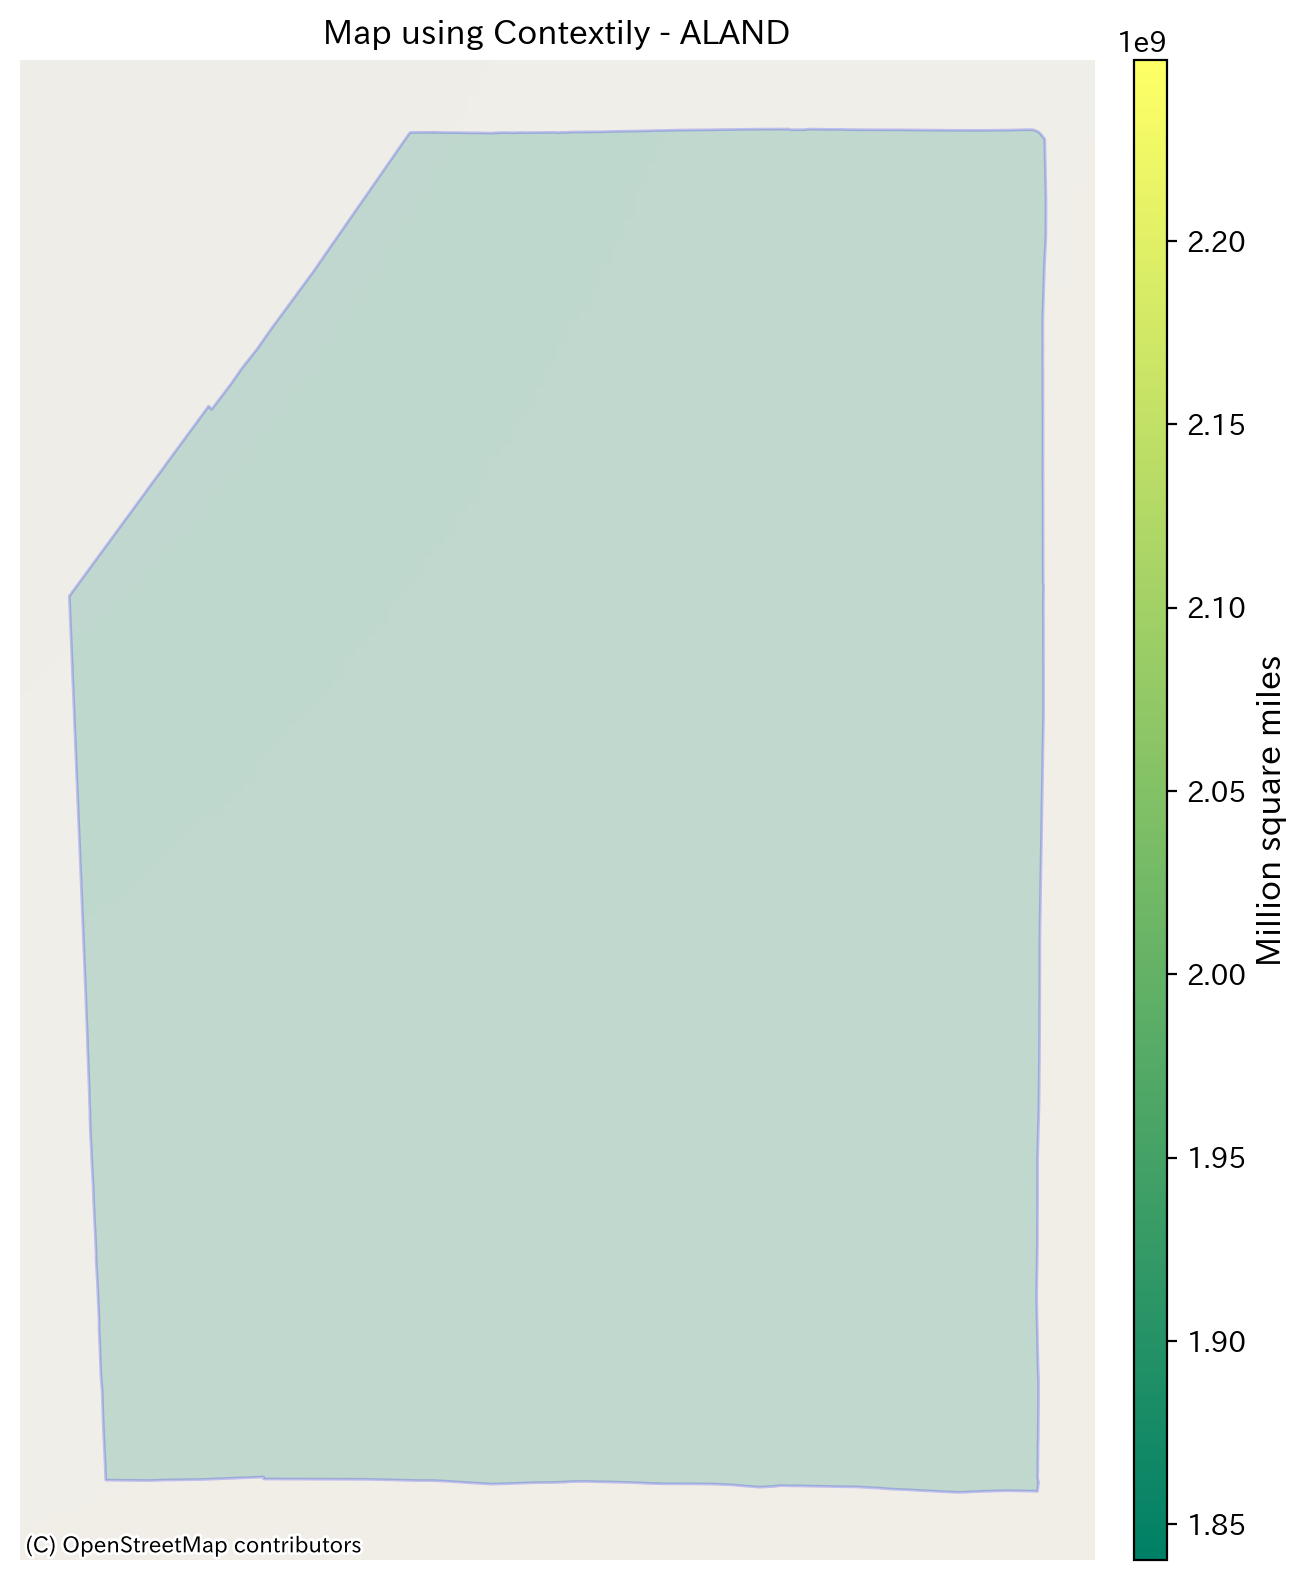

In [36]:
countyPlot(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"],
           'ALAND','summer',0 ,200)


In [41]:
def PGHFB_Area_Plot(dataframe, data, cmap, zoom, dpi):
    county = dataframe.loc[dataframe['NAME'].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", "Fayette",
                                           "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]
    county.crs = "EPSG:4326"
    f,ax = plt.subplots(1,1, figsize=(8,8), 
    sharex=True,sharey=True, dpi=dpi)
    f.tight_layout(pad=0.8)
    ax.set_axis_off()
    plt.title('Map using Contextily - ' + data,fontsize='large')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    ux = county.to_crs(epsg=3857).plot(data, ax=ax, 
    edgecolor='blue',    cmap=cmap, alpha = 0.2, 
    legend=True, cax=cax)
    ctx.add_basemap(ux,    zoom=zoom,
    source=ctx.providers.OpenStreetMap.Mapnik);
    plt.ylabel('Million square miles', fontsize=12)
    # Use savefig to save your map
    plt.savefig(
    'US Contextily Map with zoom = ' + str(zoom) +' .png')
    plt.show()

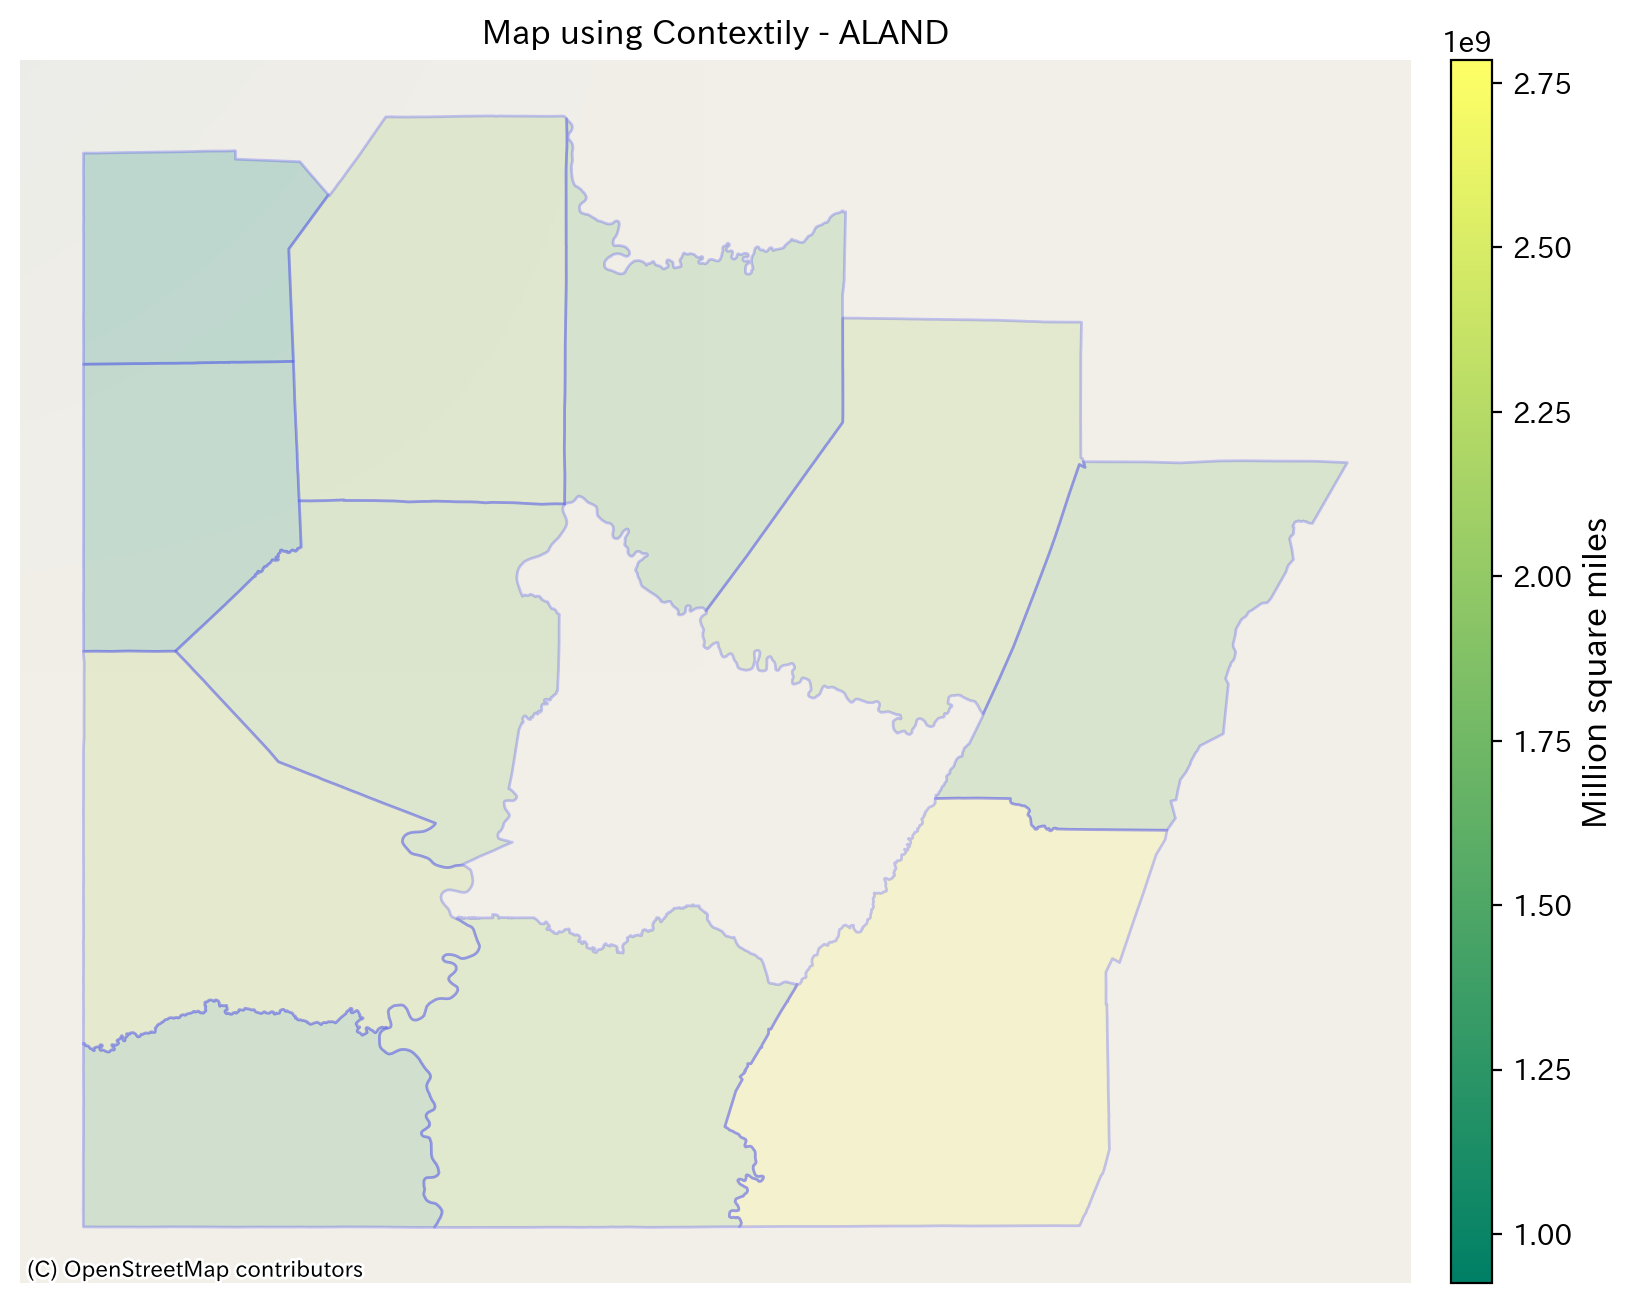

In [42]:
PGHFB_Area_Plot(df_pa, 'ALAND','summer',0 ,200)

# 重ねる練習

In [43]:
# Geodata of PA
path = "./tl_2021_42_tract/tl_2021_42_tract.shp"
df_2 = gpd.read_file(path)
df_2 = df_2.to_crs("EPSG:4326")

In [46]:
df_2.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,42,077,006203,42077006203,62.03,Census Tract 62.03,G5020,S,9594416,41079,+40.5790725,-075.5793185,"POLYGON ((-75.60407 40.58908, -75.60292 40.589..."
1,42,071,010400,42071010400,104,Census Tract 104,G5020,S,3580124,44884,+40.1632732,-076.3959727,"POLYGON ((-76.41153 40.15845, -76.41081 40.158..."
2,42,071,010701,42071010701,107.01,Census Tract 107.01,G5020,S,3262699,19429,+40.1592270,-076.6023940,"POLYGON ((-76.61856 40.14877, -76.61689 40.151..."
3,42,071,010702,42071010702,107.02,Census Tract 107.02,G5020,S,3686476,15566,+40.1479563,-076.5964831,"POLYGON ((-76.61549 40.14639, -76.61516 40.146..."
4,42,071,012302,42071012302,123.02,Census Tract 123.02,G5020,S,3012839,70912,+40.1812843,-076.1933396,"POLYGON ((-76.20863 40.19871, -76.20860 40.198..."


In [81]:
# Read census data
df_3 = gpd.read_file("FoodAccessResearchAtlas_.csv") 

In [82]:
df_3.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,geometry
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,4345,2057,73,2,13,110,161,97,100,None
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,2706,580,171,2,8,162,119,805,248,None
2,42003020300,Pennsylvania,Allegheny County,1,616,403,0,0,0.00,0,...,466,96,39,0,1,14,10,74,0,None
3,42003030500,Pennsylvania,Allegheny County,1,2256,1154,0,116,5.14,0,...,307,1861,24,0,7,57,32,470,469,None
4,42003040200,Pennsylvania,Allegheny County,1,2604,594,0,1259,48.35,0,...,1373,1003,169,0,7,52,61,254,224,None


In [83]:
import pandas as pd
# merge, key=CensusTract
df_3 = pd.merge(df_2, df_3, left_on='GEOID', right_on='CensusTract')

In [84]:
df_3.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,geometry_y
0,42,019,910700,42019910700,9107,Census Tract 9107,G5020,S,61338334,849306,...,2960,4,6,1,5,11,5,15,63,None
1,42,019,911501,42019911501,9115.01,Census Tract 9115.01,G5020,S,59415345,65370,...,5432,28,11,0,3,30,33,230,64,None
2,42,059,970300,42059970300,9703,Census Tract 9703,G5020,S,226976317,131728,...,4646,27,3,0,6,51,45,66,184,None
3,42,059,970600,42059970600,9706,Census Tract 9706,G5020,S,2085694,0,...,4006,74,20,3,10,63,31,105,320,None
4,42,003,980400,42003980400,9804,Census Tract 9804,G5020,S,1106319,0,...,19,2,0,0,0,0,0,0,0,None


In [85]:
df_3 = pd.merge(df_3, 
                df_2[["GEOID", "geometry"]], on="GEOID")

In [86]:
# 収入データの型を変更
df_3 = df_3.astype({'TractLOWI': float})

In [87]:
gdf_3 = gpd.GeoDataFrame(df_3, geometry='geometry') 

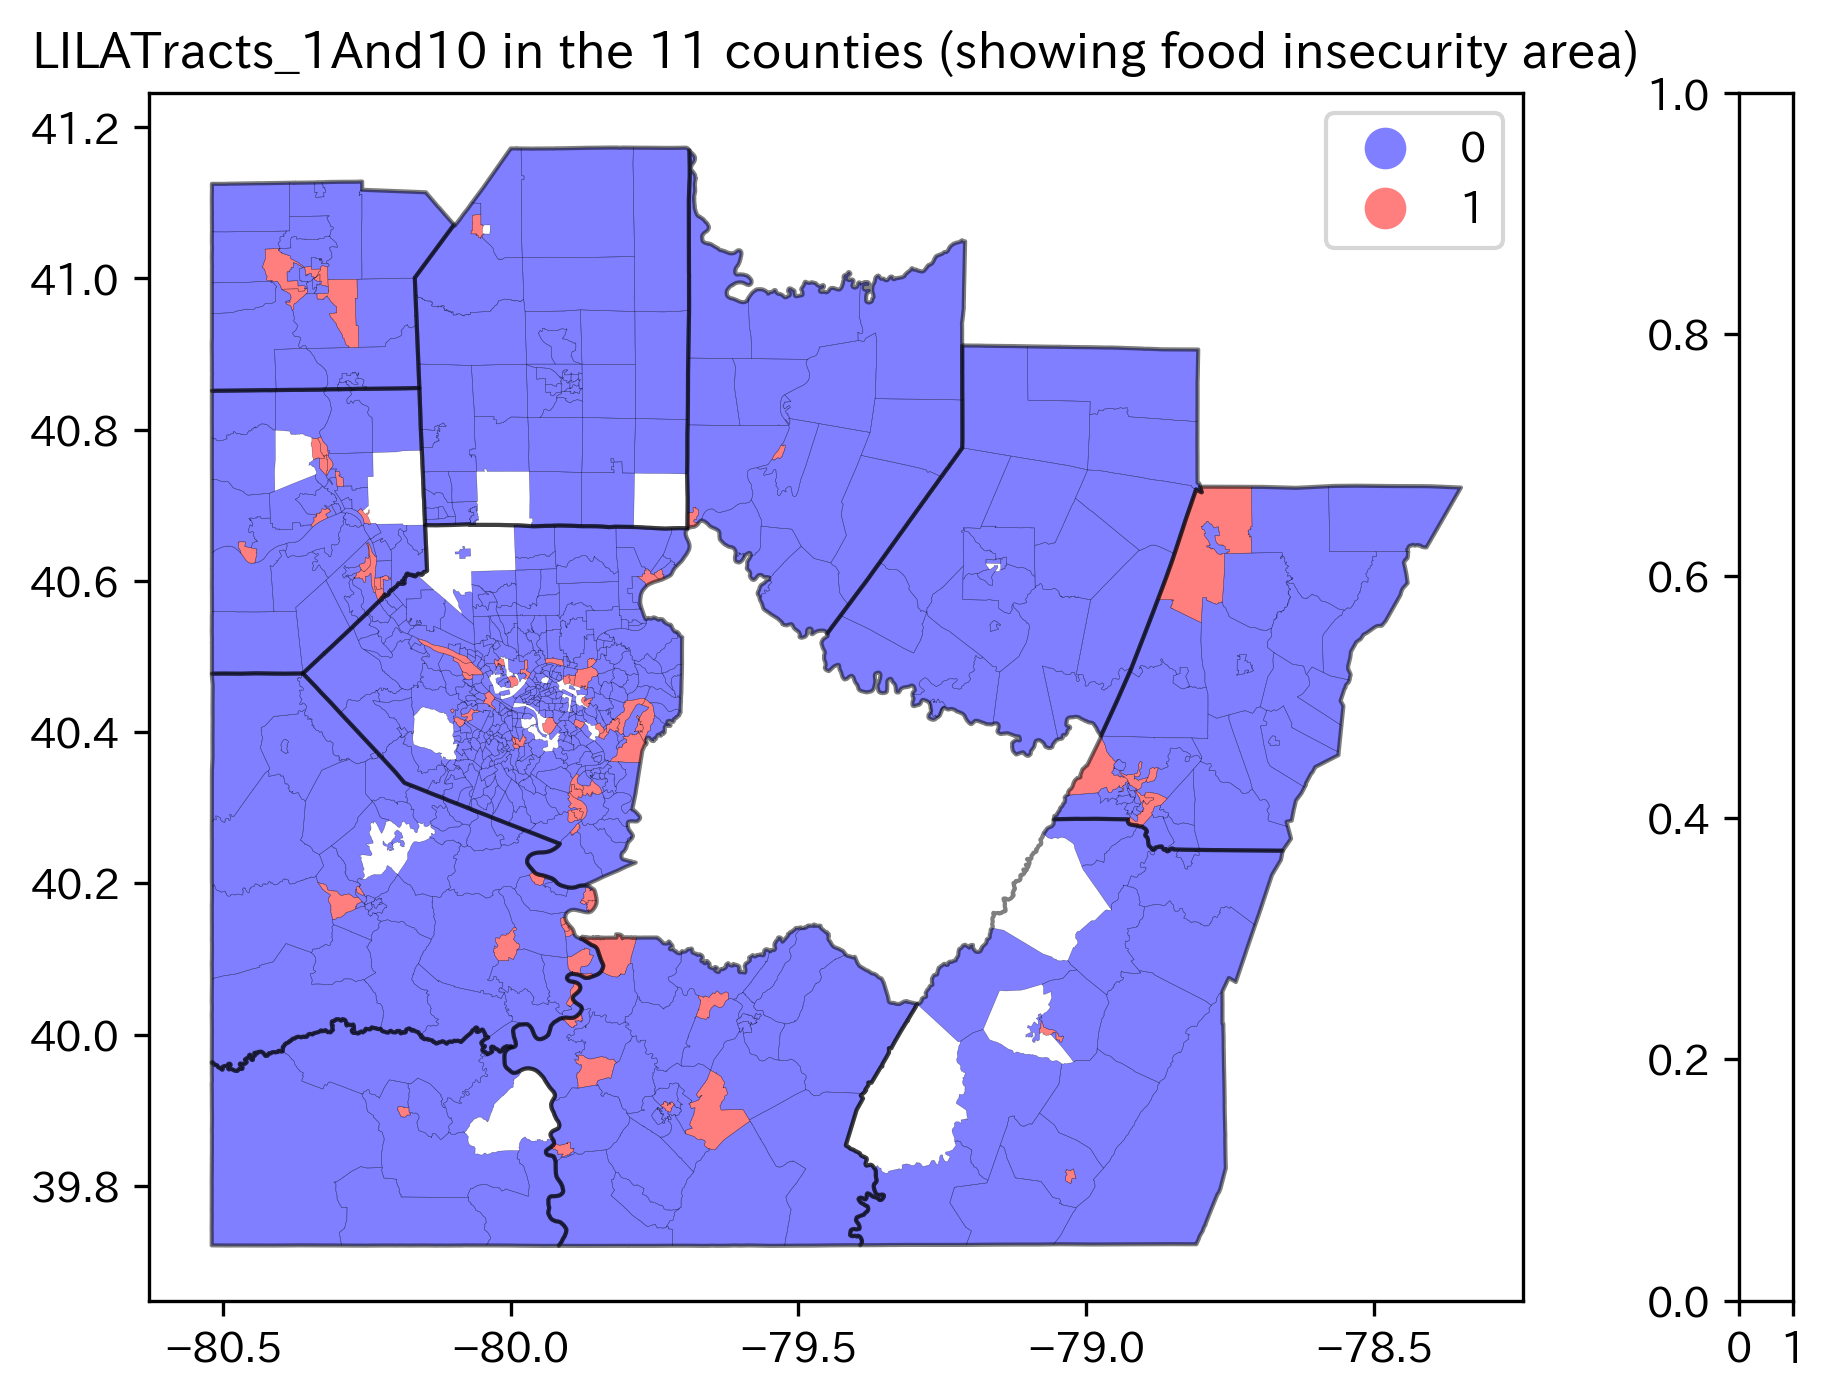

In [73]:
# プロット（boundary plot用の11countiesのdfとデータのdfが必要）
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('LILATracts_1And10 in the 11 counties (showing food insecurity area)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf_3.plot('LILATracts_1And10', ax=ax, alpha=0.5, cmap='bwr', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_pa.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

AttributeError: 'GeoDataFrame' object has no attribute 'dtype'

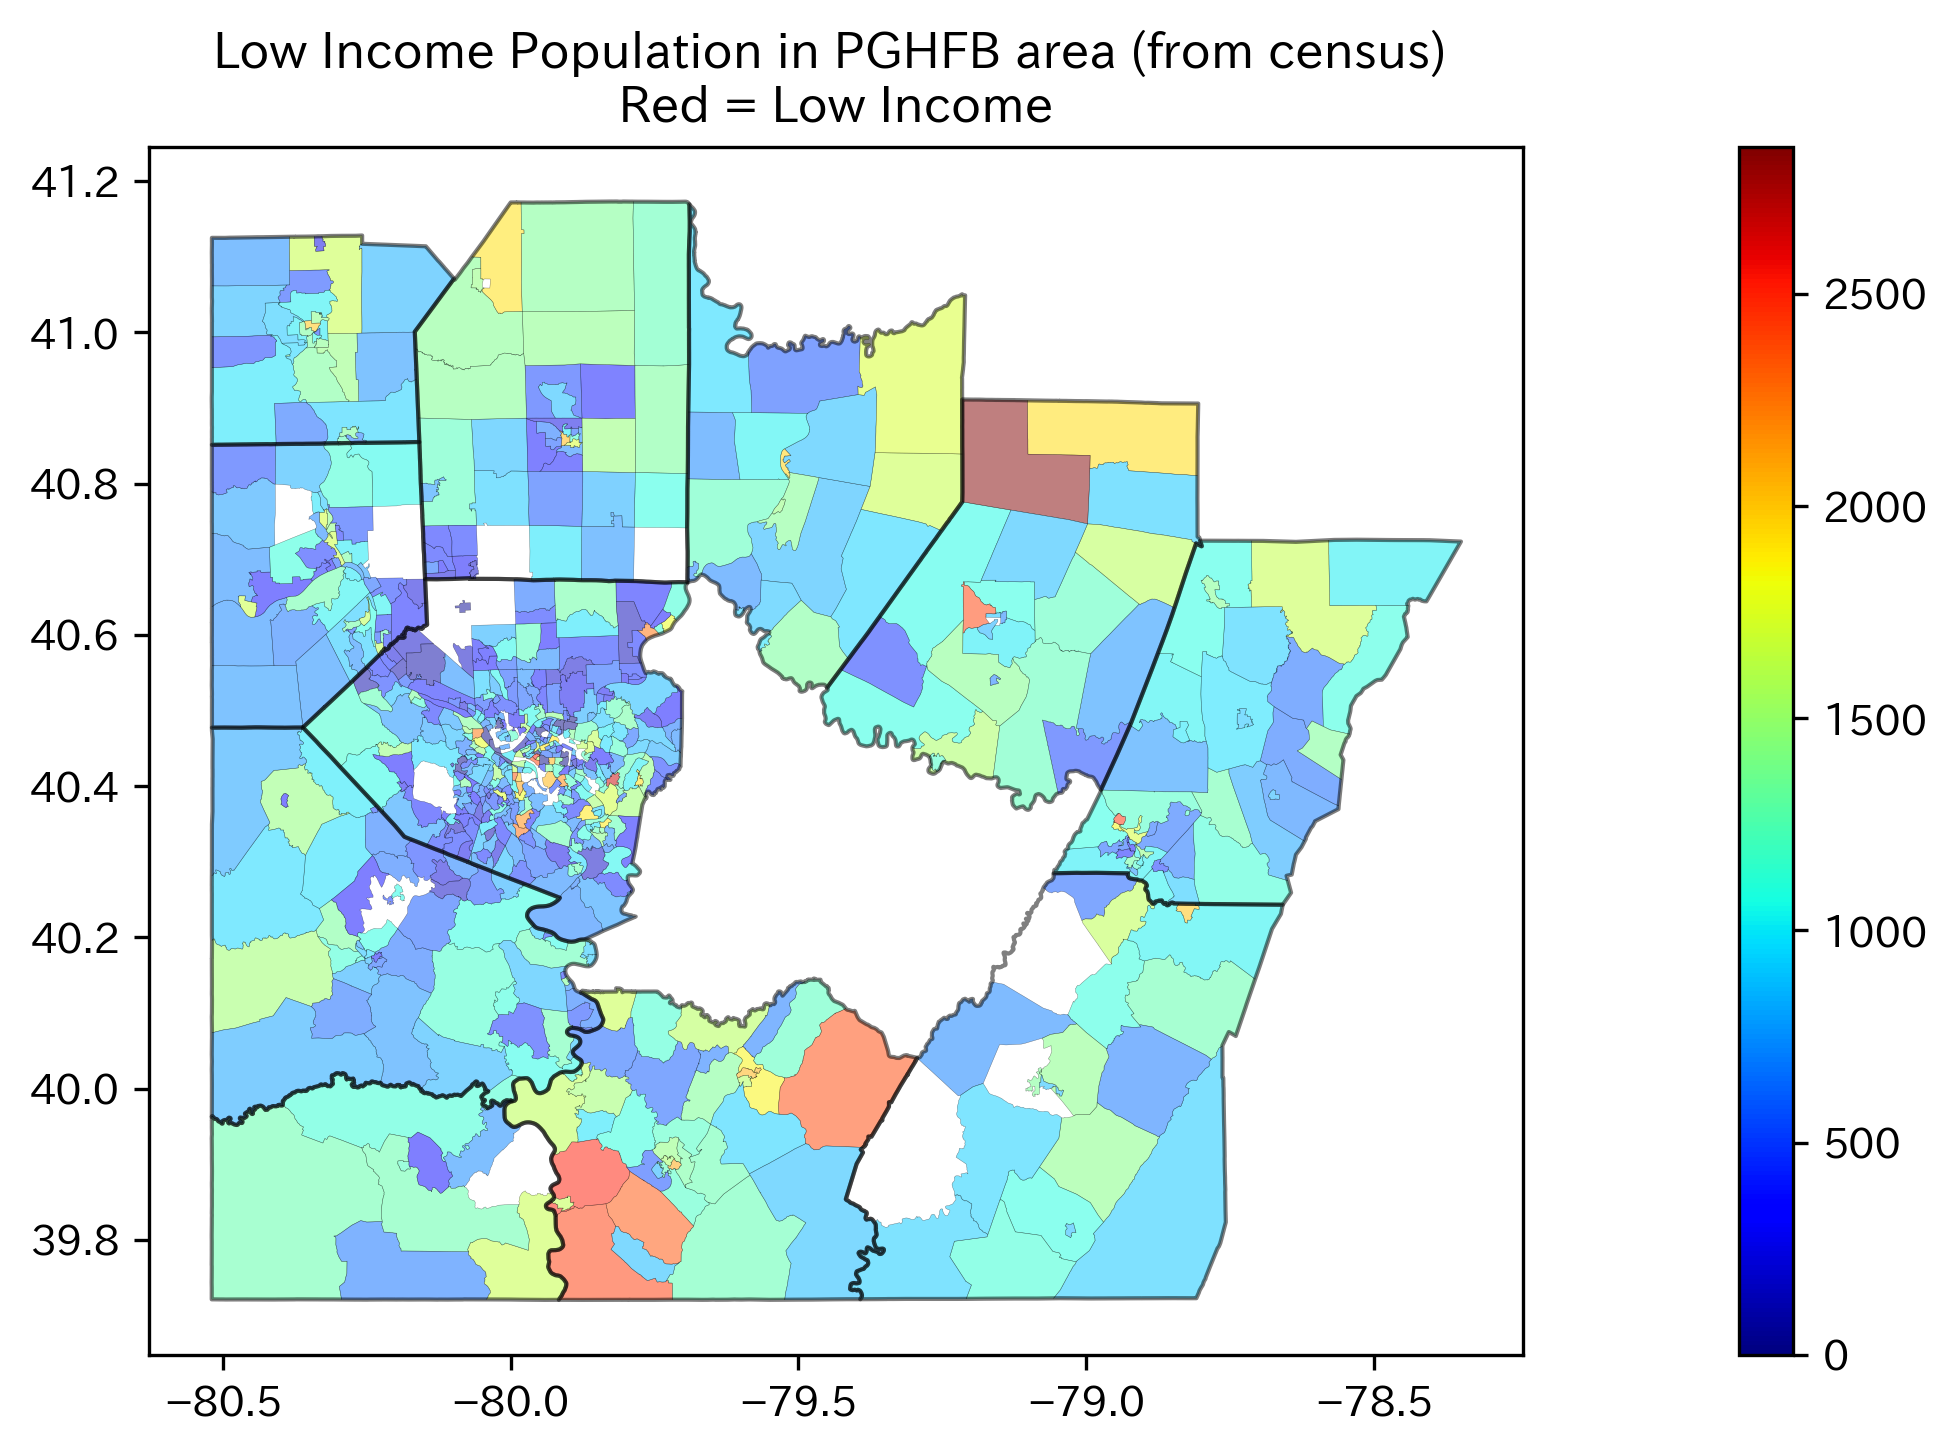

In [96]:
# プロット（boundary plot用の11countiesのdfとデータのdfが必要）
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Low Income Population in PGHFB area (from census) \n Red = Low Income ')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf_3.plot('TractLOWI', ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_pa.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [ ]:

# 2色用カラーマップ
cmap = ListedColormap(["blue","red"])

# プロット（boundary plot用の11countiesのdfとデータのdfが必要）
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Low Income Population in PGHFB area (from census) \n Red = Low Income ')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf_3.plot('TractLOWI', ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_pa.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()